# Submit your solution to the google form (link is available in telegram channel), due to 02/05/2023 23:59 Moscow time.

In [1]:
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn

You should consider upgrading via the '/Users/alexglushko/PycharmProjects/ds-for-business/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/alexglushko/PycharmProjects/ds-for-business/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/alexglushko/PycharmProjects/ds-for-business/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/alexglushko/PycharmProjects/ds-for-business/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('train_dataset.csv')

You are asked to build a model to predict the cost of acquiring a customer, the table contains the following features:
1. Store specific information:
    - store_sales(in millions) - store_sales(in million dollars)
    - unit_sales(in millions) - unit_sales(in millions) in stores Quantity
    - Store_sqft - STORE AREA AVAILABLE IN SQFT
    - Units_per_case - UNITS/CASE UNITS AVAILABLE IN EACH STORE SHELVES
    - Coffee_bar - COFFEE BAR available in store
    - Video_store - VIDEO STORE/gaming store available
    - Salad_bar - SALAD BAR available in store
    - Prepared_food - food prepared available in store
    - Florist - flower shelves available in store
2. Customer related information:
    - Total_children - TOTAL CHILDREN IN HOME
    - avg_cars_at home(approx) - avg_cars_at home(approx)
    - Num_children_at_home - num_children_at_home AS PER CUSTOMERS FILLED DETAILS
    - Cost - COST ON ACQUIRING A CUSTOMERS in dollars
3. Information about specific product (which was bought by a customer in the store):
    - Gross_weight - gross_weight OF ITEM
    - Recyclable_package - FOOD ITEM IS recyclable_package
    - Low_fat - LOW_FAT FOOD ITEM IS LOW FAT
    
    
![cfm](convinient_food_mart.jpg)
    
Recall, that this table contains already aggregated, anonymized, obfuscated and partially synthetic data. The dataset contains multiple rows per store, per customer, per item, but we do not have `customer_id`, `purchase_id`, `item_id`, `store_id` fields, thus making the analysis somehow limited. Though, it is ideal for our first home assignment.

---

Your goal for this home assignment is two-fold:
1. Make you comfortable with data wrangling:
    - Extract rows/columns statistics
    - Visualize the dependencies
    - Gain some insights
2. Build a simple, but correct and full machine learning pipeline
    - Select proper performance metrics
    - Split the data into train and test subsets
    - Run a k-fold cross-validation on a training part to select optimal hyperparameters of the model
    - Train a model with optimal hyperparameters on the whole train set
    - Make a predictions on test set
    - Analyse the generalizability of the model by comparing its performance on train and test sets
    - Comment on whether the resulting model is "good" or "bad" from business point of view

# Analyze general data information

## Question 0. What is the goal of this dataset?

In [4]:
df.head(3)

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,2.68,2.0,1.0,0.0,2.0,6.30,1.0,0.0,22.0,30584.0,1.0,1.0,1.0,1.0,1.0,79.59
1,5.73,3.0,5.0,5.0,3.0,18.70,1.0,0.0,30.0,20319.0,0.0,0.0,0.0,0.0,0.0,118.36
2,2.62,2.0,1.0,1.0,1.0,9.21,0.0,0.0,9.0,20319.0,0.0,0.0,0.0,0.0,0.0,67.20


## Question 1. How many observations are in the dataset?

In [5]:
df.shape[0]

51363

## Question 2. How many features are in the dataset? (excluding `target` column)

In [6]:
df.drop('cost', axis=1).shape[1]

15

## Question 3. What is the difference between numerical and categorical features?

Which of the following best describes the difference between categorical and numerical features in machine learning?

Categorical features represent distinct categories or labels with no inherent numerical order, while numerical features represent measurable quantities with numerical values.

## Question 4. How many numerical and categorical features are in the dataset?  (excluding `target` column)

In [7]:
df_desc = df.drop('cost', axis=1).describe().T
df_desc

,count,mean,std,min,25%,50%,75%,max
store_sales(in millions),51363.0,6.531792,3.464902,0.51,3.8,5.94,8.64,22.92
unit_sales(in millions),51363.0,3.091194,0.827293,1.00,3.0,3.00,4.00,6.00
total_children,51363.0,2.538111,1.489316,0.00,1.0,3.00,4.00,5.00
num_children_at_home,51363.0,0.832019,1.303775,0.00,0.0,0.00,1.00,5.00
avg_cars_at home(approx).1,51363.0,2.199424,1.109080,0.00,1.0,2.00,3.00,4.00
gross_weight,51363.0,13.805512,4.622431,6.00,9.7,13.60,17.70,21.90
recyclable_package,51363.0,0.558437,0.496578,0.00,0.0,1.00,1.00,1.00
low_fat,51363.0,0.351148,0.477334,0.00,0.0,0.00,1.00,1.00
units_per_case,51363.0,18.856550,10.263746,1.00,10.0,19.00,28.00,36.00
store_sqft,51363.0,27979.153593,5701.145280,20319.00,23593.0,27694.00,30797.00,39696.00


In [8]:
number_categorical = df_desc[df_desc['min'] == 0][df_desc['max'] == 1].shape[0]
number_numerical = df_desc.shape[0] - number_categorical
print(f"Number categorical: {number_categorical}\nNumber numerical: {number_numerical}")

Number categorical: 7
Number numerical: 8


/var/folders/03/8g_v72pd32vfbhfq91cfy1780000gn/T/ipykernel_79169/2531921071.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  number_categorical = df_desc[df_desc['min'] == 0][df_desc['max'] == 1].shape[0]


# Analyze store specific information

## In most cases stores which have a Coffee bar, do prepare food

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Confusion Matrix Heatmap')

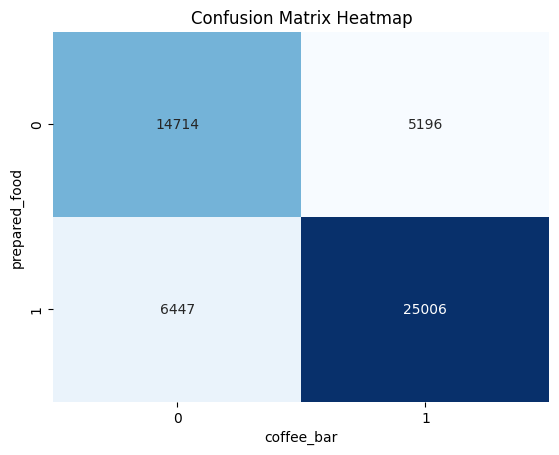

In [10]:
# Compute a confusion matrix
cm = confusion_matrix(df['coffee_bar'], df['prepared_food'])

# Create a heatmap with seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)

# Add labels to the x-axis and y-axis
plt.xlabel('coffee_bar')
plt.ylabel('prepared_food')

# Add a title
plt.title('Confusion Matrix Heatmap')

## Question 5. How many stores which have a Salad bar do prepare food?

Based on your answer decide if you need to drop one of the (duplicated) columns.

Text(0.5, 1.0, 'Confusion Matrix Heatmap')

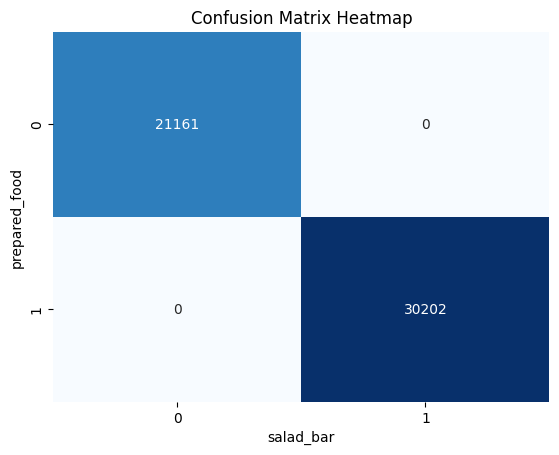

In [11]:
# Compute a confusion matrix
cm = confusion_matrix(df['salad_bar'], df['prepared_food'])

# Create a heatmap with seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)

# Add labels to the x-axis and y-axis
plt.xlabel('salad_bar')
plt.ylabel('prepared_food')

# Add a title
plt.title('Confusion Matrix Heatmap')

We need to drop salad bar, becouse if we save prepared food we always have salad bar and if we have prepared food we always have salad bar.

## Having a Coffee bar decreases the average media campaign cost

Text(0, 0.5, 'Marketing cost')

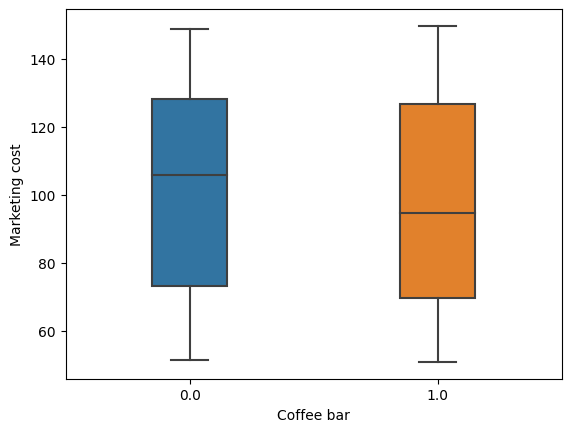

In [12]:
sns.boxplot(data=df, x='coffee_bar', y='cost', width=.3)
plt.xlabel('Coffee bar')
plt.ylabel('Marketing cost')

In [13]:
df.groupby('coffee_bar')['cost'].agg(['mean', 'median', 'std'])

,mean,median,std
coffee_bar,,,
0.0,101.659804,105.74,30.162547
1.0,97.850422,94.79,29.841456


## Question 6. Does having a video store, a salad bar, an option to buy prepared food or a	florist decreases the average cost of media campaign?

Text(0, 0.5, 'Marketing cost')

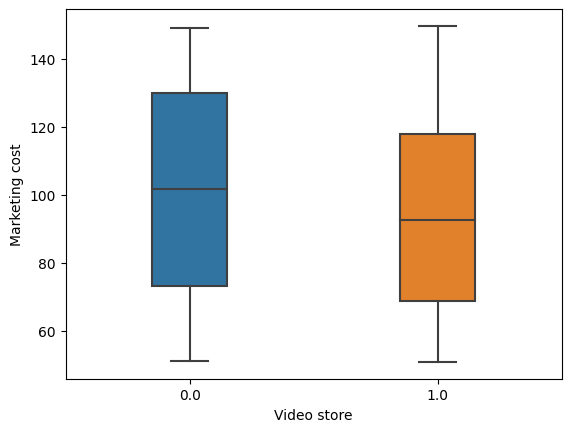

In [14]:
sns.boxplot(data=df, x='video_store', y='cost', width=.3)
plt.xlabel('Video store')
plt.ylabel('Marketing cost')

In [15]:
df.groupby('video_store')['cost'].agg(['mean', 'median', 'std'])

,mean,median,std
video_store,,,
0.0,101.781734,101.84,30.035569
1.0,94.843250,92.57,29.479086


Text(0, 0.5, 'Marketing cost')

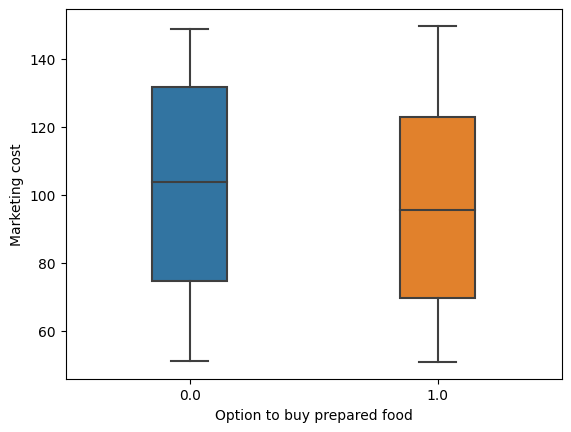

In [16]:
sns.boxplot(data=df, x='prepared_food', y='cost', width=.3)
plt.xlabel('Option to buy prepared food')
plt.ylabel('Marketing cost')

In [17]:
df.groupby('prepared_food')['cost'].agg(['mean', 'median', 'std'])

,mean,median,std
prepared_food,,,
0.0,102.750251,103.90,29.947633
1.0,96.928612,95.45,29.843937


Text(0, 0.5, 'Marketing cost')

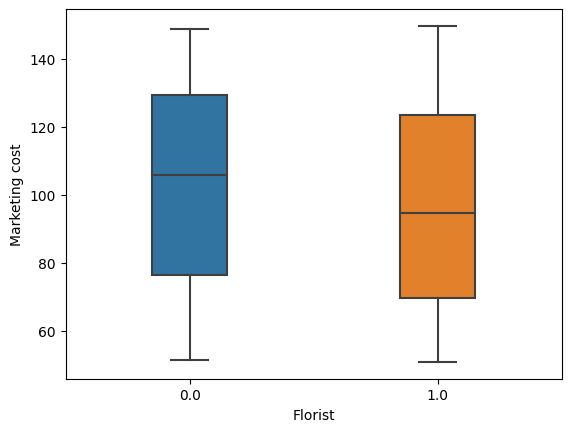

In [18]:
sns.boxplot(data=df, x='florist', y='cost', width=.3)
plt.xlabel('Florist')
plt.ylabel('Marketing cost')

In [19]:
df.groupby('florist')['cost'].agg(['mean', 'median', 'std'])

,mean,median,std
florist,,,
0.0,102.373140,105.74,29.258121
1.0,96.951385,94.79,30.396434


## Most of the stores have under 15 mln sales, with 90% of sales being under 12 mln.

The distribution is right-skewed (positive skew), with mean around 6.5mln.

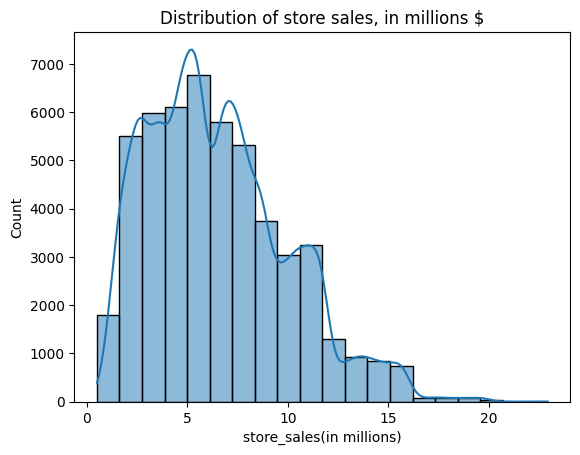

In [20]:
sns.histplot(df['store_sales(in millions)'], kde=True, bins=20)
plt.title(f'Distribution of store sales, in millions $');

In [21]:
df['store_sales(in millions)'].quantile(0.93)

11.85

In [22]:
df['store_sales(in millions)'].mean()

6.531791562019353

## Question 7. What could you say about distribution of marketing costs?


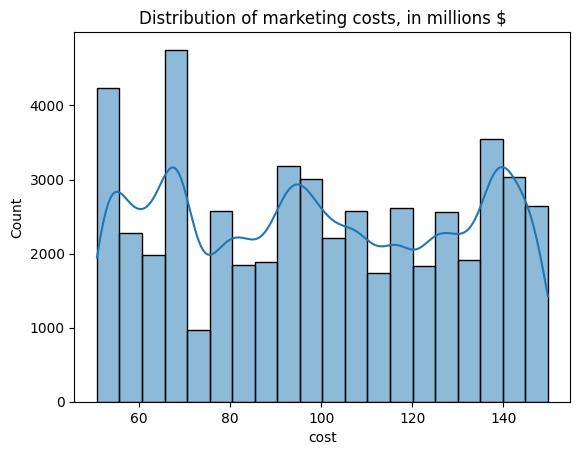

In [23]:
sns.histplot(df['cost'], kde=True, bins=20)
plt.title(f'Distribution of marketing costs, in millions $');

## Question 8. What percentage of sales go into marketing cost?

Assuming that all rows with the same `store_sales(in millions)` come from the same store, and that all rows are from unique customers, the total sales are $7979 \text{mln}, \$ $, and the total costs are $5101736\$$.


In [24]:
store_sales_sum = df['store_sales(in millions)'].unique().sum()
store_sales_sum

7979.009999999999

In [25]:
costs_sum = df['cost'].sum()
costs_sum

5101736.01

In [26]:
costs_percentage = round(costs_sum / (store_sales_sum * 1_000_000) * 100, 2)
print(f"Marketing costs persantage: {costs_percentage}%")

Marketing costs persantage: 0.06%


## Here is a plot of sales vs store area

It seems that while there is no clear dependence (stores with the largest sales vary in the square foot area a lot), 
there are some obvious clusters, e.g. stores with about 25000 square feet area and sales between 3 and 7 mln.

/var/folders/03/8g_v72pd32vfbhfq91cfy1780000gn/T/ipykernel_79169/2920269509.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=sub, x='store_sales(in millions)', y='store_sqft',


<Axes: xlabel='store_sales(in millions)', ylabel='store_sqft'>

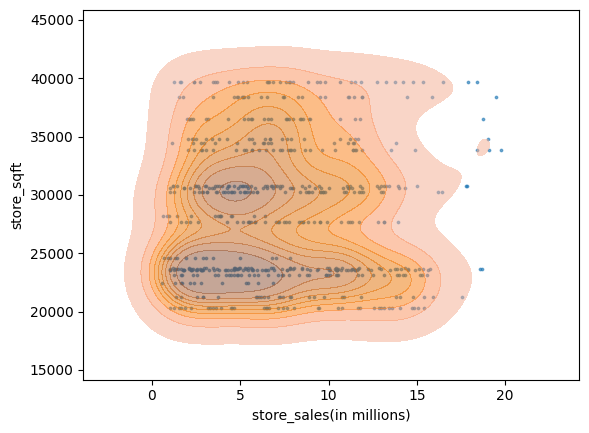

In [27]:
sub = df[['store_sales(in millions)','store_sqft']].drop_duplicates()
sub = sub[::20]

plt.scatter(sub['store_sales(in millions)'], sub['store_sqft'], s=3, alpha=0.6)

sns.kdeplot(data=sub, x='store_sales(in millions)', y='store_sqft',
            palette="deep", alpha=0.5, levels=10, fill=True)

## Question 9. What is the average sales per squre foot area?

In [29]:
round(((df['store_sales(in millions)'] * 1_000_000) / df['store_sqft']).mean(), 1)

242.8

## Interestingly, the marketing costs in  stores with >=10 mln sales is not much different from the costs in stores with lower <10mln sales

In [30]:
df[df['store_sales(in millions)'] >= 10]['cost'].mean()

99.60226463674017

In [31]:
df[df['store_sales(in millions)'] < 10]['cost'].mean()

99.26912514730145

## Question 10. Is there any dependence between size of the store in square feet and the cost of marketing?

Select all that apply


/var/folders/03/8g_v72pd32vfbhfq91cfy1780000gn/T/ipykernel_79169/3062974378.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=sub, x='cost', y='store_sqft',


<Axes: xlabel='cost', ylabel='store_sqft'>

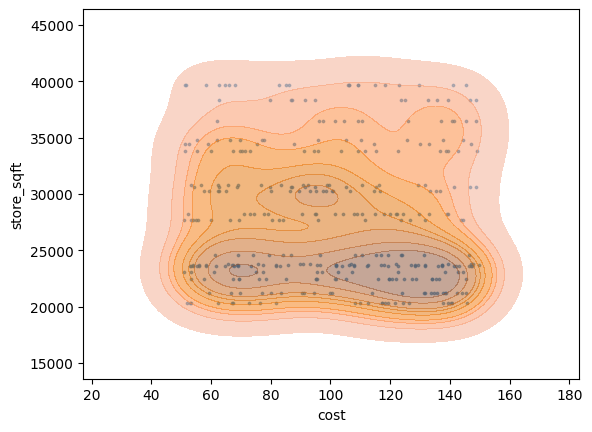

In [32]:
sub = df[['cost','store_sqft']].drop_duplicates()

plt.scatter(sub['cost'], sub['store_sqft'], s=3, alpha=0.6)
sns.kdeplot(data=sub, x='cost', y='store_sqft',
            palette="deep", alpha=0.5, levels=10, fill=True)

In [34]:
sqft_50 = df['store_sqft'].quantile(0.5)
littel_stores = df[df['store_sqft'] <= sqft_50]
big_stores = df[df['store_sqft'] > sqft_50]
big_store_cost_per = (big_stores['cost'] / big_stores['store_sqft']).mean()
littel_stores_cost_per = (littel_stores['cost'] / littel_stores['store_sqft']).mean()
print(f"Little store cost per sqft: {round(littel_stores_cost_per, 5)}")
print(f"Big store cost per sqft: {round(big_store_cost_per, 5)}")

Little store cost per sqft: 0.00434
Big store cost per sqft: 0.00299


In [35]:
print(f"Marketing costs for little stores: {round(littel_stores['cost'].mean(), 2)}")
print(f"Marketing costs for little stores: {round(big_stores['cost'].mean(), 2)}")
dif_percent =  round(
    (littel_stores['cost'].mean() - big_stores['cost'].mean()) / big_stores['cost'].mean() * 100, 2)
print(f"The difference in marketing costs between small and large stores: {dif_percent}%")

Marketing costs for little stores: 99.81
Marketing costs for little stores: 98.77
The difference in marketing costs between small and large stores: 1.05%


## Let's investigate the stores with the smallest cost to aqcuire a customers

In [36]:
df.cost.min()

50.79

In [37]:
sub = df.query('cost==50.79')

In [38]:
store_columns = [
    'store_sales(in millions)','unit_sales(in millions)',
    'store_sqft','coffee_bar','video_store',
    'salad_bar','prepared_food','florist'
]

First, these are mostly small stores with sales under 10mln

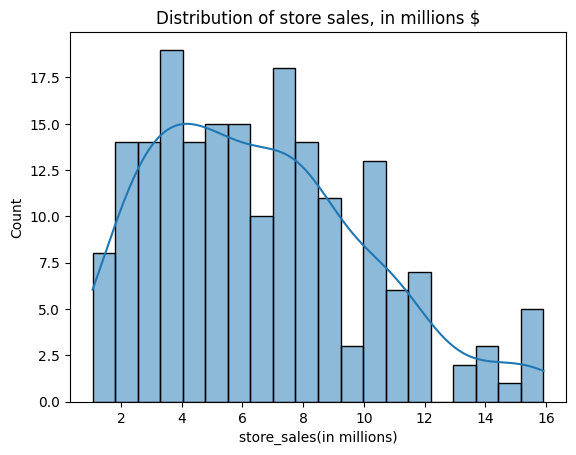

In [39]:
sns.histplot(sub['store_sales(in millions)'], kde=True, bins=20)
plt.title(f'Distribution of store sales, in millions $');

In [40]:
sub['store_sqft'].mean(), sub['store_sqft'].std() 

(27694.0, 0.0)

In [41]:
sub['store_sqft'].unique()

array([27694.])

Second, it seems they all have **all** additional services

In [42]:
for col in ['coffee_bar','video_store',
    'salad_bar','prepared_food','florist']:
    print(col, sub[col].unique())

coffee_bar [1.]
video_store [1.]
salad_bar [1.]
prepared_food [1.]
florist [1.]


## What about stores with the largest cost to aqcuire a customers?

In [43]:
df.cost.max()

149.75

In [44]:
sub = df.query('cost==149.75')

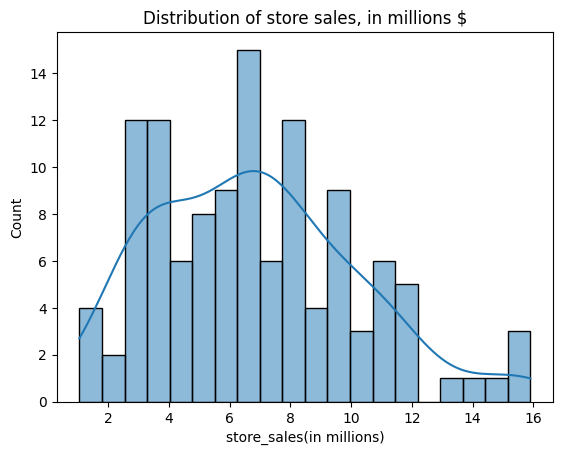

In [45]:
sns.histplot(sub['store_sales(in millions)'], kde=True, bins=20)
plt.title(f'Distribution of store sales, in millions $');

In [46]:
sub['store_sqft'].mean(), sub['store_sqft'].std() 

(23688.0, 0.0)

In [47]:
for col in ['coffee_bar','video_store',
    'salad_bar','prepared_food','florist']:
    print(col, sub[col].unique())

coffee_bar [1.]
video_store [1.]
salad_bar [1.]
prepared_food [1.]
florist [1.]


They are also mostly small stores with under 10mln sales and all services included. It seems that the difference is not explained by the stores. Could it be explained by customers?

## Question 10. Do distribution of number of kids vary for the lowest cost and largest cost rows?

1. Try using `countplot` instead of `histplot`.
2. Use total number of kids (instead of kids at home)

In [54]:
sub_max_cost = df[df['cost'] == df.cost.max()]
sub_min_cost = df[df['cost'] == df.cost.min()]

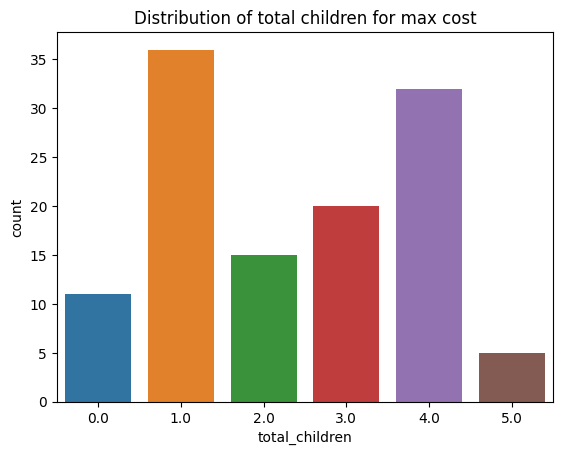

In [58]:
sns.countplot(x=sub_max_cost['total_children'])
plt.title(f'Distribution of total children for max cost');

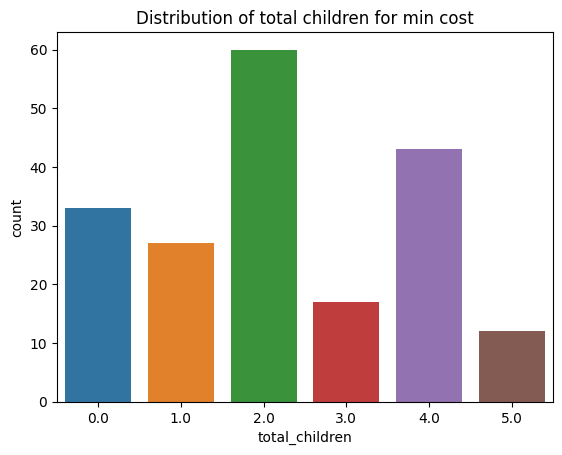

In [60]:
sns.countplot(x=sub_min_cost['total_children'])
plt.title(f'Distribution of total children for min cost');

## Feel free to investigate other features

In [64]:
df.groupby('total_children')['cost'].agg(['mean', 'median', 'std'])

,mean,median,std
total_children,,,
0.0,99.814923,98.81,29.705981
1.0,99.975659,98.81,30.307694
2.0,98.713164,97.13,30.277183
3.0,99.554904,99.38,30.132676
4.0,98.724865,97.45,29.773775
5.0,99.682351,99.38,29.504798


# Build Machine Learning pipeline

- What are the proper performance metrics for this task?
- Compare cross-validation performance of 5 ML models
- Compute models' performance on test set
- Analyse the generalizability of the model by comparing its performance on train and test sets
- Comment on whether the resulting model is "good" or "bad" from business point of view

## Question 11. What are the proper performance metrics for this task?


## Split your data into Train and Test subsets using `train_test_split`, use 70% to 30% ratio for train and test.

## Question 12.  How many observations are in your `train` set?


## We will compare the performance of 5 ML models:

1. Linear Regression
2. Decision Tree
3. Random Forest
4. KNN
5. Gradient Boosting

## Question 13. Which of the models require feature standartization?


## We will use `GridSearchCV` method to run 5 fold cross-validation and select models' hyperparameters

see example below (on Iris dataset)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [48]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

iris = datasets.load_iris()

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5, scoring='accuracy', refit=True)
clf.fit(iris.data, iris.target)
print(clf.best_score_)

0.9800000000000001


## Explore hyperparameters of different ML models

## Question 14. What does `fit_intercept` parameter responcible for in Linear Regression?


In [49]:
from sklearn.linear_model import LinearRegression

Train Linear Regression model using GridSearchCV, compare models with `fit_intercept=True` and `fit_intercept=False` 

## Question 15. What does `max_depth` and `min_samples_split` responcible for in Decision Tree Regressor?


In [50]:
from sklearn.tree import DecisionTreeRegressor

Train Decision Tree Regressor model using GridSearchCV, ask ChatGPT for reasonable set of hyperparameters (`max_depth` and `min_samples_split`) values for search.

## Question 16. What does `n_estimators` and `max_depth` responcible for in Random Forest Regressor?


In [51]:
from sklearn.ensemble import RandomForestRegressor

Train Random Forest Regressor model using GridSearchCV, ask ChatGPT for reasonable set of hyperparameters (`max_depth` and `n_estimators`) values for search.


## Question 17. What does `n_neighbors` responcible for in K Neighbors Regressor?


In [52]:
from sklearn.neighbors import KNeighborsRegressor

Train KNeighborsRegressor model using GridSearchCV, ask ChatGPT for reasonable set of hyperparameter `n_neighbors` values for search.

## Question 18. How `n_neighbors` affects KNN performance?


## Question 19. How `learning_rate` and `n_estimators` affect Gradient Boosting Regressor performance?


In [53]:
from sklearn.ensemble import GradientBoostingRegressor

Train Gradient Boosting Regressor model using GridSearchCV, ask ChatGPT for reasonable set of hyperparameters `learning_rate`, `n_estimators` and `max_depth` values for search. 

## Question 20. Test 5 ML models performance on Test set, which model perform the best?


- Linear Regression
- Decision Tree
- Random Forest
- KNN
- Gradient Boosting


## Question 21. What is the `MAE` of the best perfroming model? (report `MAE` with 2 decimal places)

## Question 22. Comment on whether the resulting model is "good" or "bad" from business point of view, given that the mean cost is 99$

## Upload your Jupyter Notebook or Orange project.